# VII. ЧИСЛЕННОЕ ИНТЕГРИРОВАНИЕ
# 9.5б
<font size="5">
    Для функции, заданной таблично, вычислить значение определённого интеграла методом трапеций, сделать уточнение результата эктраполяцией Ричардсона. Сравнить уточненный результат с вычислениями по методу Симпсона.

In [1]:
import numpy as np

x = np.arange(0,1+0.125,0.125)
print(x)
f = [0,0.021470,0.293050,0.494105,0.541341,0.516855,0.468617,0.416531,0.367879]

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


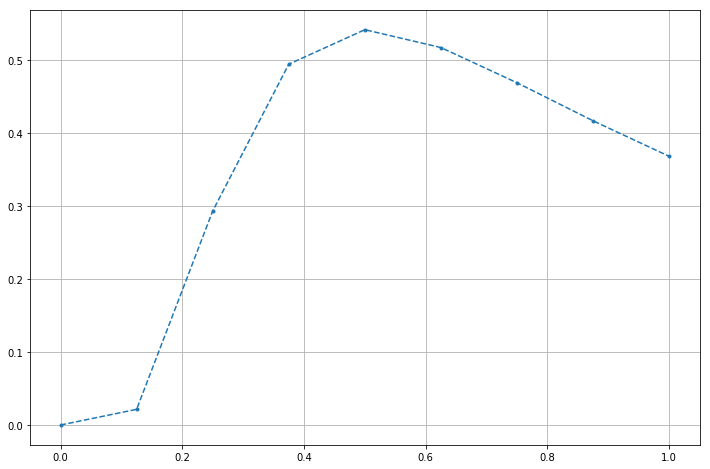

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize = (12,8))

ax.plot(x,f,linestyle='dashed',marker='.')
ax.grid()

<font size="5">
    $I_{h} = I + ch^{n}$<br>
    $I_{2h} = I + c(2h)^{n}$<br>
    $I_{2h} - I_{h} = ch^{n}[2^{n}-1]$<br>
    $Δ = \frac{I_{2h} - I_{h}}{2^{n}-1}$<br>
    Экстраполяция Ричардсона : $I = I_{h} - Δ$<br>

In [4]:
Ih = 0
for i in range(len(x)-1):
    Ih += (x[i+1] - x[i])*(f[i+1] + f[i])/2
print('Ih = ',Ih)

I2h = 0
i = 0
while i < int(len(x)-1):
    I2h += (x[i+2] - x[i])*(f[i+2] + f[i])/2
    i += 2

print('I2h = ',I2h)
Δ = (I2h - Ih)/(2**2 - 1)
print('Δ = ',Δ)
I = Ih-Δ
print('I = Ih + Δ = ',I)

Ih =  0.3669885625
I2h =  0.37173687499999997
Δ =  0.0015827708333333208
I = Ih + Δ =  0.3654057916666667


<font size="5">
    Формулы Симпсона :<br><br>
    $I \approx \sum \frac{h}{3}[f(x_{2k}) + 4f(x_{2k+1}) + f(x_{2k+2})]$<br>
    $I \approx \frac{h}{3}$[first + 4(sum of odds) + 2(sum of evens) + last]<br>

In [5]:
Is = 0
h = 0.125

Is += f[0] + f[8]

for k in range(1,int(len(x)/2)):
    Is += 2*f[2*k]
for k in range(0,int(len(x)/2)):
    Is += 4*f[2*k+1]    
    
Is *= (h/3)
print("I Simpson = ",Is)

I Simpson =  0.36540579166666665


<font size="5">
    Интегралы по методу Симпсона и по экстраполяции Ричардсона совпадают с огромной точностью.

# 9.10г
<font size="5">
    Вычислить несобственный интеграл с точностью до $10^{-4}$<br><br>
    $\large \int^{1}_{0} \frac{ln(x^{2} + 1)}{\sqrt{x}} dx = 2\sqrt{x}\,ln(1+x^{2})|^{1}_{0} - \int^{1}_{0}\frac{4x\sqrt{x}}{1+x^{2}}dx$<br><br>
    $\large = 2ln(2) -\int^{1}_{0}\frac{4x\sqrt{x}}{1+x^{2}}dx$<br><br>

<font size="5">
Интеграл справа посчитаем по формуле трапеции:<br>
$I \approx \sum \frac{dx}{2}[f(x_{k+1}) + f(x_{k})]$<br><br>

In [6]:
import numpy as np
J = 0
dx = 10**(-5)
x = np.linspace(0,1,10**5)

#выбрал шаг 10**-5 потому-что для 10**-6 нужно подождать немного

def f(x):
    return 4*x*np.sqrt(x)/(1+x**2)

y = f(x)
for k in range(len(x)-1):
    J += y[k+1] + y[k]

J *= dx/2
I = 2*np.log(2) - J
print("I = ",I)
print("Ответ совпадает с ответом в Вольфраме до 4го знака после запятой")

I =  0.3220889019918989
Ответ совпадает с ответом в Вольфраме до 4го знака после запятой


<font size="5">
Оценка погрешности формулы трапеций:<br>
    $ ε \leq \frac{1}{12} max|f^{(2)}(x)|(b-a)h^{2}$<br>
    где $f(x) = \frac{4x\sqrt{x}}{1+x^{2}}$<br><br>
    оказывается, $|f^{(2)}(x)|$ имеет особенность в 0<br>
    Найдём поправку к интегралу, с помощью процесса Эйкера<br><br>
    $Δ \approx ch^{p}$<br>
    $I = I_{h} + ch^{p} = I_{2h} + c(2h)^{p} = I_{4h} + c(4h)^{p}$<br>
    Отсюда $2^{p} = \frac{I_{4h} - I_{2h}}{I_{2h} - I_{h}}$<br><br>
    $\large Δ = ch^{p} = \frac{(I_{h} - I_{2h})^{2}}{2I_{2h} - I_{4h} - I_{h}}$<br>

In [10]:
Ih = 0
I2h = 0
I4h = 0

k = 0
while k < len(x)-1:
    Ih += y[k+1] + y[k]
    k += 1
Ih *= dx/2
Ih = 2*np.log(2) - Ih
print("Ih = ",Ih)

k = 0
while k < len(x)-2:
    I2h += y[k+2] + y[k]
    k += 2
I2h *= 2*dx/2
I2h = 2*np.log(2) - I2h
print("I2h = ",I2h)

k = 0
while k < len(x)-4:
    I4h += y[k+4] + y[k]
    k += 4
I4h *= 4*dx/2
I4h = 2*np.log(2) - I4h
print("I4h = ",I4h)

Δ = (Ih - I2h)**2
Δ /= (2*I2h - I4h - Ih)
print("Δ = ", Δ)
print("I = ", Ih+Δ)

Ih =  0.32207836626075625
I2h =  0.32207856626082765
I4h =  0.32207896626075794
Δ =  -2.0000028389000432e-07
I =  0.32207816626047236


In [13]:
import numpy as np
J = 0
dx = 10**(-8)
x = np.linspace(0,1,10**8)

def f(x):
    return 4*x*np.sqrt(x)/(1+x**2)

y = f(x)
for k in range(len(x)-1):
    J += y[k+1] + y[k]

J *= dx/2
I = 2*np.log(2) - J
print("I с шагом 10^-8 = ",I)

I с шагом 10^-8 =  0.32207827048131454


<font size="5">
    $I (Wolfram) : 0.3220782598$<br>
    $I (h = 10^{-8}) : 0.322078270$<br>
    $I (h = 10^{-5}) : 0.322078366$<br>
    $I (h = 10^{-5} + Эйкер) : 0.322078166$ <br>

In [15]:
I = 0.3220782598
i5 = 0.322078366
i5e = 0.322078166

print(abs(I-i5))
print(abs(I-i5e))

1.062000000162655e-07
9.379999998948563e-08


<font size="5">
    Поправка Эйкера чуть чуть улучшила результат

# 9.13б
<font size="5">
    Функция f(x) задана своими сеточными значениями. Найти $\int^{b}_{a}\,f(x)sin(kx)dx $ построением сплайна для аппроксимации f(x)<br><br>
    k = 80

In [17]:
import matplotlib.pyplot as plt
import numpy as np
xd = [0.1,0.5,0.9,1.3,1.7]
f = [-2.3026,-0.69315,-.10536,.26236,.53063]

#Cubic spline

## Cubic spline
<font size="5">
    <br>
    $S_{0}(x) = a_{0}(x-x_{0})^{3} + b_{0}(x-x_{0})^{2} +c_{0}(x-x_{0}) + y_{0}$<br>
    ...<br>
    $S_{n-1}(x) = a_{n-1}(x-x_{n-1})^{3} + b_{n-1}(x-x_{n-1})^{2} +c_{n-1}(x-x_{n-1}) + y_{n-1}$<br><br><br>
    $1)\,S_{i}(x_{i}) = y_{i}$<br>
    $2)\, S_{i-1}(x_{i}) = S_{i}(x_{i})$<br>
    $3)\, S'_{i-1}(x_{i}) = S'_{i}(x_{i})$<br>
    $4)\,S''_{i-1}(x_{i}) = S''_{i}(x_{i})$<br>
    $5)\,S''_{0}(x_{0}) = S''_{n-1}(x_{n-1}) = 0$ (natural spline) <br><br>

<font size="5">
    $$ \begin{bmatrix}
    1 & (x_{1} - x_{0}) & 0 & ...\,\\
    0 & 2(x_{2}- x_{0}) & (x_{2} - x_{1}) & ...\,\\
    0 & (x_{1} - x_{0}) & 2(x_{3}- x_{1}) & ...\,\\
    0 & 0 & (x_{2} - x_{1}) & ...\\
    \end{bmatrix} 
    \begin{bmatrix} S''_{0} \\ S''_{1} \\ ... \end{bmatrix} = 6
\begin{bmatrix}
0 \\
\frac{y_{2} - y_{1}}{x_{2} - x_{1}} - \frac{y_{1} - y_{0}}{x_{1} - x_{0}}\\
...
\end{bmatrix} $$ <br>

<font size="5">
    <br>
    $S''_{k}(x_{k}) = 2b$<br><br>
    $S''_{i-1}(x_{i}) = S''_{i}(x_{i})$<br>
    $6a_{k-1}(x_{k} - x_{k-1}) + 2b_{k-1} = 2b_{k}$<br>
    $a_{k-1} = \frac{2(b_{k} - b_{k-1})}{6(x_{k} - x_{k-1})}$<br><br>
    $S'_{i-1}(x_{i}) = S'_{i}(x_{i})$<br>
    $3a_{k-1}(x_{k} - x_{k-1})^{2} + 2b_{k-1}(x_{k} - x_{k-1}) + c_{k-1} = c_{k}$<br>

[[1.  0.4 0.  0.  0. ]
 [0.  1.6 0.4 0.  0. ]
 [0.  0.4 1.6 0.4 0. ]
 [0.  0.  0.4 1.6 0. ]
 [0.  0.  0.  0.4 1. ]]
[  0.      -15.3249   -3.30105  -1.49175   0.     ]
[ 3.89573304 -9.73933259  0.64508036 -1.09361384  0.43744554]


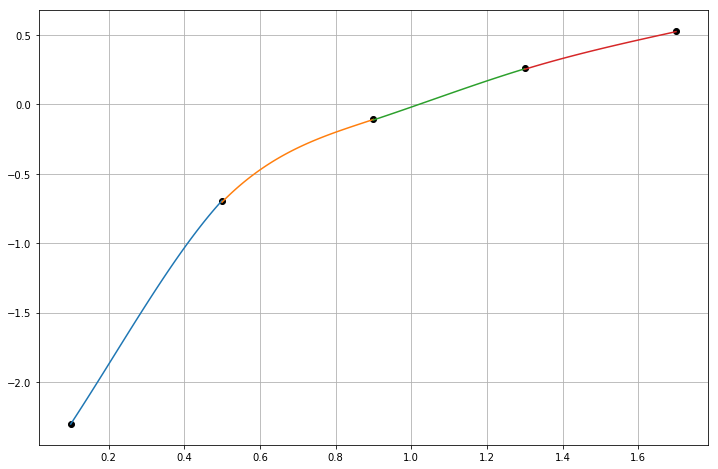

In [18]:
n = len(xd)
M = np.zeros((n,n))
M[0][0] = 1
M[n-1][n-1] = 1
for j in range(1,n-1):
    M[j-1][j] = xd[j] - xd[j-1]
    M[j][j] = 2*(xd[j+1] - xd[j-1])
    M[j+1][j] = xd[j] - xd[j-1]
            
print(M)

v = np.zeros(n)
for j in range(1,n-1):
    v[j] = (f[j+1] - f[j])/(xd[j+1] - xd[j])
    v[j] -= (f[j] - f[j-1])/(xd[j] - xd[j-1])
    v[j] *= 6
print(v)
import numpy as np
S = np.linalg.solve(M,v)
print(S)

a = np.zeros(n)
b = np.zeros(n)
c = np.zeros(n)

for j in range(len(S)-1):
    b[j] = S[j]/2
for j in range(len(S)-1):
    a[j] = 2*(b[j+1] - b[j])
    a[j] /= 6*(xd[j+1] - xd[j])
for j in range(1,len(S)-1):
    #c[j] = 3*a[j-1]*(xd[j]-xd[j-1])**2 + 2*b[j-1]*(xd[j]-xd[j-1]) + c[j-1]
    c[j] = (f[j+1]-f[j])/(xd[j+1] - xd[j])
    c[j] -= (xd[j+1] - xd[j])*(2*b[j] + b[j+1])/3
    
c[0] = f[1] - a[0]*(xd[1]-xd[0])**3 - b[0]*(xd[1]-xd[0])**2 - f[0]
c[0] /= (xd[1]-xd[0])

def fk(x,k):
    return a[k]*(x-x[k])**3 + b[k]*(x-x[k])**2 + c[k]*(x-x[k]) + f[k]

ox = []
for j in range(n-1):
    ox.append(np.linspace(xd[j],xd[j+1],100))  
    
y = []
for k in range(n-1):
    y.append(fk(ox[k],k))
#print(y)


fig, ax = plt.subplots(1, figsize = (12,8))

ax.scatter(xd,f,color='k');
ax.grid()
for k in range(n-1):
    ax.plot(ox[k],y[k])

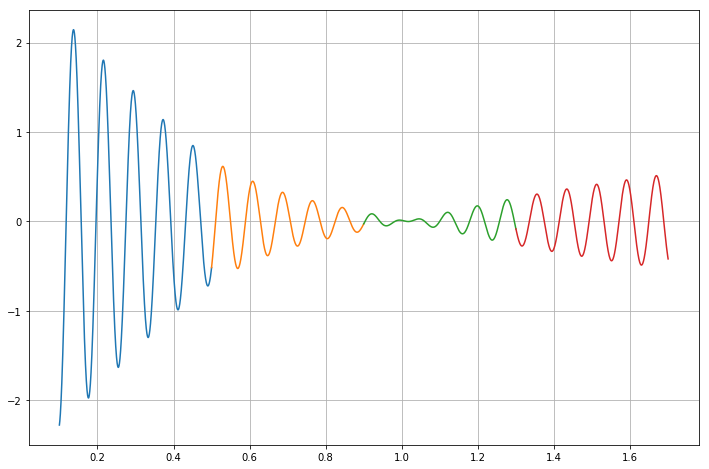

In [20]:
ox = []
for j in range(n-1):
    ox.append(np.linspace(xd[j],xd[j+1],10**6))    

y = []
for k in range(n-1):
    y.append(np.sin(80*ox[k])*fk(ox[k],k))


fig, ax = plt.subplots(1, figsize = (12,8))

for k in range(n-1):
    ax.plot(ox[k],y[k])

ax.grid()

In [21]:
I = 0
h = 10**(-6)  
for k in range(n-1):
    for i in range(len(ox[k])-1):
        I += y[k][i+1] + y[k][i]

I *= h/2
print(I)

0.01891583567078851


# 8.12 з
<font size="5">
    Построить квадратуру Гаусса-Кристоффеля с двумя узлами для вычисления интеграла:<br>
    $\int^{1}_{-1}\,\sqrt{1 - x^{2}}\,f(x)dx$

<font size="5">
    $(f(x),g(x)) = \int^{1}_{-1}\,\sqrt{1 - x^{2}}\,f(x)g(x)dx$<br><br>
    Ортогонализация Грамма-Шмидта:<br>
    $Q_{0} = 1,\,Q_{1} = x,\,\tilde{Q_{2}} = x^{2}$<br>
    Так как функция чётная, $Q_{0}$ и $Q_{1}$ уже ортогональны.<br><br>
    $Q_{2} = x^{2} - \frac{(\tilde{Q_{2}},Q_{1})}{(Q_{1},Q_{1})}Q_{1} - \frac{(\tilde{Q_{2}},Q_{0})}{(Q_{0},Q_{0})}Q_{0}$<br><br>
    Посчитаем скалярные произведения:<br>

<font size="5">
    $(Q_{0},Q_{0}) = \int^{1}_{-1}\sqrt{1-x^{2}}dx = π/2$<br>
    $(Q_{1},Q_{1}) = \int^{1}_{-1}x^{2}\sqrt{1-x^{2}}dx = π/8$<br>
    $(\tilde{Q_{2}},Q_{0}) = \int^{1}_{-1}x^{2}\sqrt{1-x^{2}}dx = π/8$<br>
    $(\tilde{Q_{2}},Q_{1}) = \int^{1}_{-1}x^{3}\sqrt{1-x^{2}}dx = 0$<br><br>

<font size="5">
    $Q_{2} = x^{2} - \frac{1}{4}$<br> 
    Узлы квадратуры : $x_{12} = \pm \frac{1}{2}$<br>

<font size="5">
    $c_{i} = \int^{1}_{-1}\,\frac{(x-x_{1})(x-x_{2})...}{(x_{i}-x_{1})(x_{i}-x_{2})...}dx$<br><br>
    $c_{1} = \int^{1}_{-1}\, \frac{x+1/2}{1/2 - (-1/2)}dx
    = \int^{1}_{-1}\, x + 1/2dx = 1$<br>
    $c_{2} = \int^{1}_{-1}\, \frac{x-1/2}{-1/2 - (1/2)}dx
    = \int^{1}_{-1}\, -x + 1/2dx = 1$<br>

<font size="5">
    $\int^{1}_{-1}\,\sqrt{1 - x^{2}}\,f(x)dx = \sum c_{i}f(x_{i})$<br>